#Algoritmo de Louvain

El método de Louvain corresponde a un algoritmo de optimización codicioso que permite extraer comunidades de grandes redes. Tiene un tiempo de ejecucion O(n log(n)), donde n corresponde al número de nodos de la red. Lo anterior quiere decir que si la cantidad de nodos aumenta de manera exponencial, el tiempo de ejecución del algoritmo aumenta linealmente, lo que hace que sea rápido de ejecutar para conjuntos grandes de nodos.

A continuación, se presenta la parte de código de la actividad, donde deberás completar las partes señaladas.

MultiGraph with 30 nodes and 111 edges


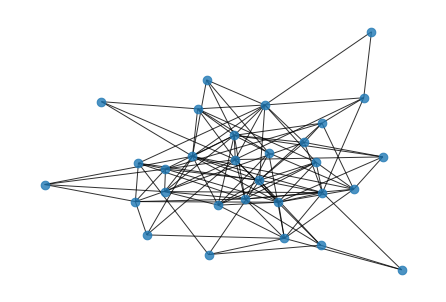

In [4]:
import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt


def generate_network(n):
    '''
    This function will generate a random weighted network associated to the user specifed
    number of nodes. 
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
    '''
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)}
    nodes = list(range(n))
    
    # generate edges
    for n,edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes) / 2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    G.remove_edges_from(list(nx.selfloop_edges(G)))
    return G

# aqui debes ingresar la cantidad de nodos del grafo (entre 30 y 150 idealmnete) e instanciar la red G
n = 30
G = generate_network(n)


print(nx.info(G))

# visualize graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

In [5]:
#El siguiente código entrega las comunidades en G
comms = community_louvain.best_partition(G)

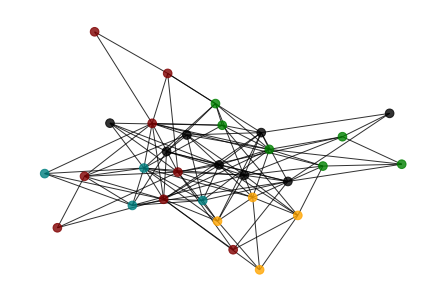

In [6]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

#Responde:
1. ¿Que te llama la atención del grafo?

Me llama la atención que no necesariamente los puntos de igual color son los más cercanos. Tambien que hay puntos con distinto número de conecciones (2, 3, 4).

2. ¿Notas agrupaciones de nodos?,¿A que crees que se deba esto? Tip: revisa las líneas 25 y 26 del código.

Se nota que hay nodos que se agrupan. Esto se debe al algoritmo, donde se toma el nodo minimo y la mitad del máximo para luego obtener uno cualquiera entre estos dos, el cual será el nuevo nodo. Esto lo que hace es generar nodos que estén cerca.

3. ¿Que crees que se podria hacer para mejorar las agrupaciones de los elementos?

Lo que se podría hacer es en vez de sacar la mitad del nodo máximo, sacar 1/3. Esto nos dará mayor proximidad entre nodos.

4. ¿Para que crees que se podría utilizar el algoritmo de Louvian en la industria de las RRSS?

Puede ser bastante util encontrando sugerencias de amistad por ejemplo, donde se podria detectar mediante una aproximación tipo grafo un perfil que sea un posible conocido.

#SNAP Dataset

En https://snap.stanford.edu/data/, puedes encontrar una compilación de distintos datasets, pero estos son distintos a los que probablemente conoces, ya que no se basan en datos individuales descritos por sus atributos, sino que se representan como grafos. A continuación, se muestra como cargar uno de estos datasets (especificamente el de facebook), utilizando networkx.

In [8]:
fb_g = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)
print(nx.info(fb_g))

Graph with 4039 nodes and 88234 edges


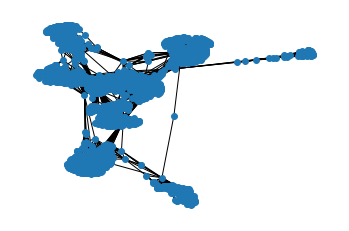

In [9]:
fb_pos = nx.spring_layout(fb_g)
plt.axis("off")
nx.draw_networkx(fb_g, pos=fb_pos, with_labels=False, node_size=35)

#1. Utilizar algoritmo de Luvain
Ahora que ya sabes como usar el algoritmo de Luvain utilizalo para obtener las distintas comunidades en el grafo

In [16]:
#El siguiente código entrega las comunidades en fb_g
comms = community_louvain.best_partition(fb_g)

In [27]:
x = set(comms.values())
x

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

#2. Mostrar comunidades
Ahora, muestra las comunidades encontradas en el grafo, si necesitas más colores utiliza https://matplotlib.org/stable/gallery/color/named_colors.html como guía.

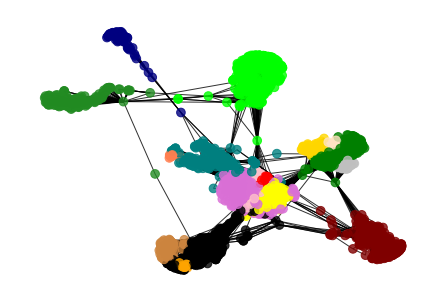

In [30]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow',
    6 : 'pink',
    7 : 'red',
    8 : 'orchid',
    9 : 'lime',
    10 : 'silver',
    11 : 'gold',
    12 : 'coral',
    13 : 'navy',
    14 : 'forestgreen',
    15 : 'bisque',
    16 : 'peru'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(fb_g)
nx.draw(fb_g, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

#3. Responder
1. ¿Que puedes observar respecto a las comunidades en este dataset de mayor tamaño?

Se puede ver que las comunidades están más apegadas. Se forman grupos de colores lejanos los unos con los otros. Las comunidades tienen menos distancia entre sus integrantes mientras que entre comunidades hay más distancia.

2. ¿Se ven resultados similares a otros métodos vistos en clases? ¿A cuál(es)?

Vemos que esto es más similar a un método de agrupación, ya que hay distintos grupos de nodos, los cuales se diferencian unos con otros.